In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from datetime import datetime

In [ ]:
df = pd.read_csv('StartupData.csv')

In [ ]:
df.shape

(102, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   No.                     102 non-null    int64  
 1   Company                 102 non-null    object 
 2   Sector                  102 non-null    object 
 3   Entry Valuation^^ ($B)  102 non-null    float64
 4   Valuation ($B)          102 non-null    float64
 5   Entry                   102 non-null    object 
 6   Location                102 non-null    object 
 7   Select Investors        102 non-null    object 
dtypes: float64(2), int64(1), object(5)
memory usage: 6.5+ KB


In [ ]:
df.drop(columns=['No.'],inplace=True)

In [ ]:
df.rename(columns={'Entry Valuation^^ ($B)':'EntryValuation', 'Valuation ($B)':'Valuation', 'Entry':'EntryDate', 'Select Investors':'Investors'},inplace=True)

In [ ]:
df['CurrentDate'] = datetime.today().strftime('%b-%Y')

In [ ]:
df['EntryDate'] = df['EntryDate'].astype("string")

In [ ]:
NewEntryDate = []
for i in df['EntryDate']:
  idx = 0
  cd = i.split('-')
  cd.insert(1,'-')
  cd.insert(2,'20')
  # print("".join(cd))
  NewEntryDate.insert(idx,"".join(cd))
  idx = idx+1;

In [ ]:
NewEntryDate.reverse()
NewEntryDate

In [ ]:
df['NewEntryDate'] = NewEntryDate

In [ ]:
df.drop(columns=['EntryDate'],inplace=True)

In [ ]:
df["CurrentDate"] = pd.to_datetime(df["CurrentDate"])
df["NewEntryDate"] = pd.to_datetime(df["NewEntryDate"])
df['Interval'] = df["CurrentDate"] - df["NewEntryDate"]
df['ValuationGrowth'] = df["Valuation"] - df["EntryValuation"]

In [ ]:
df['Interval'] = df['Interval'].apply(lambda x: x.days)
# df['NewEntryDate'] = df['NewEntryDate'].apply(lambda x: x.split('-').insert(1,'-').insert(2,'20').join())

In [ ]:
df.rename(columns={'Interval':'DayInterval'},inplace=True)

In [ ]:
df['GrowthRate(PerMonth)'] = df['ValuationGrowth']/(df['DayInterval']/30)
df['GrowthRate(PerYear)'] = df['ValuationGrowth']/(df['DayInterval']/365)

In [ ]:
df.head()

,Company,Sector,EntryValuation,Valuation,Location,Investors,CurrentDate,NewEntryDate,DayInterval,ValuationGrowth,GrowthRate(PerMonth),GrowthRate(PerYear)
0,InMobi,Adtech - Mobile Ads,1.0,1.0,Bangalore/Singapore,"KPCB, Sherpalo Ventures, SoftBank",2023-11-01,2011-09-01,4444,0.0,0.000000,0.000000
1,Flipkart^,E-Commerce,1.0,37.6,Bangalore/Singapore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2023-11-01,2012-02-01,4291,36.6,0.255884,3.113260
2,Mu Sigma,SaaS - Analytics,1.0,1.5,Bangalore/Chicago,"Accel, Sequoia Capital, General Atlantic",2023-11-01,2013-02-01,3925,0.5,0.003822,0.046497
3,Snapdeal*,E-Commerce,1.8,2.4,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2023-11-01,2014-10-01,3318,0.6,0.005425,0.066004
4,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2023-11-01,2015-02-01,3195,14.3,0.134272,1.633646


In [ ]:
TopGrowingStartups = df.sort_values(by=['GrowthRate(PerMonth)'],ascending=False)[['Company','GrowthRate(PerYear)']].head()
TopGrowingStartups

,Company,GrowthRate(PerYear)
1,Flipkart^,29.231947
10,BYJUS,12.565574
4,PayTM^,10.076255
12,Swiggy,5.320533
5,Ola Cabs,4.016409


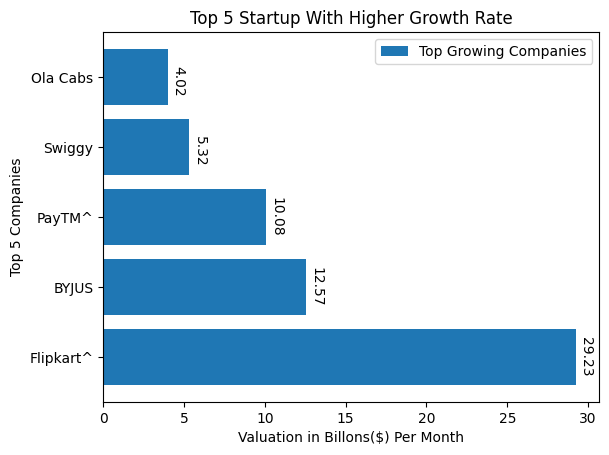

In [ ]:
pps = plt.barh(y=TopGrowingStartups['Company'],width=TopGrowingStartups['GrowthRate(PerYear)'],label='Top Growing Companies')
for p in pps:
  # print(p.get_width(),p.get_y()+p.get_height())
  plt.text(p.get_width()+0.2,p.get_y()+p.get_height()/5,round(p.get_width(),2),rotation=-90)
plt.legend()
plt.xlabel("Valuation in Billons($) Per Month")
plt.ylabel("Top 5 Companies")
plt.title('Top 5 Startup With Higher Growth Rate')
plt.show()

In [ ]:
popComp = df.groupby(['Sector']).agg(CompanyCount=('Company','count'),CumulativeGrowth=('GrowthRate(PerYear)','mean'))
popComp['CompanyCount'].describe()

count    75.000000
mean      1.360000
std       0.816055
min       1.000000
25%       1.000000
50%       1.000000
75%       1.000000
max       5.000000
Name: CompanyCount, dtype: float64

In [ ]:
popCompMask = popComp['CompanyCount']>2
popComp = popComp[popCompMask]
popComp

,CompanyCount,CumulativeGrowth
Sector,,
E-Commerce,4,0.844019
Edtech,5,0.846016
Gaming,3,0.508458
Logistics Services,4,0.072380
Marketplace - Used Cars,4,0.229167


Text(0.5, 1.0, 'Popular Domain Trends')

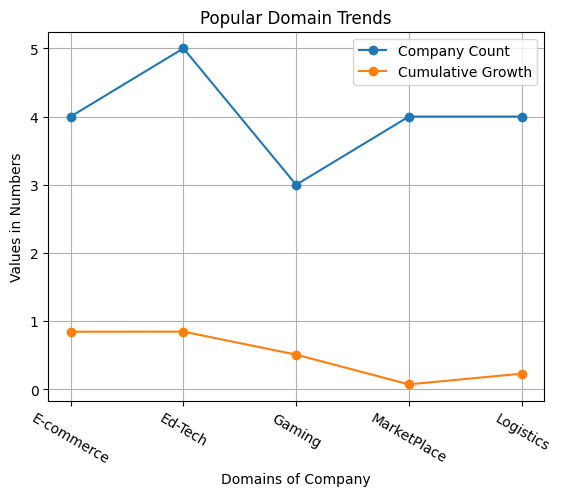

In [ ]:
plt.plot(popComp,marker='o')
xLabels = ['E-commerce','Ed-Tech','Gaming','MarketPlace','Logistics']
plt.xticks(np.arange(5),xLabels,rotation=-30)
plt.legend(labels=['Company Count','Cumulative Growth'])
plt.grid()
plt.xlabel('Domains of Company')
plt.ylabel('Values in Numbers')
plt.title('Popular Domain Trends')

In [ ]:
# df.groupby(['NewEntryDate']).agg(CompCount=('Company','count'),ValuationInvestment=('EntryValuation','sum'))
EntryYearData = df['NewEntryDate'].apply(lambda x:x.year)
df.insert(loc=6, column='EntryYear', value=EntryYearData)

In [ ]:
DatewiseData = df.groupby(['EntryYear']).agg(CompanyCount=('Company','count'),TotalInvestments=('EntryValuation','sum'))
DatewiseData['AvgInvestment'] = DatewiseData['TotalInvestments'] / DatewiseData['CompanyCount']
DatewiseData

,CompanyCount,TotalInvestments,AvgInvestment
EntryYear,,,
2011,1,1.00,1.000000
2012,1,1.00,1.000000
2013,1,1.00,1.000000
2014,1,1.80,1.800000
2015,4,5.30,1.325000
2016,2,2.50,1.250000
2018,8,14.30,1.787500
2019,9,10.10,1.122222
2020,10,16.70,1.670000


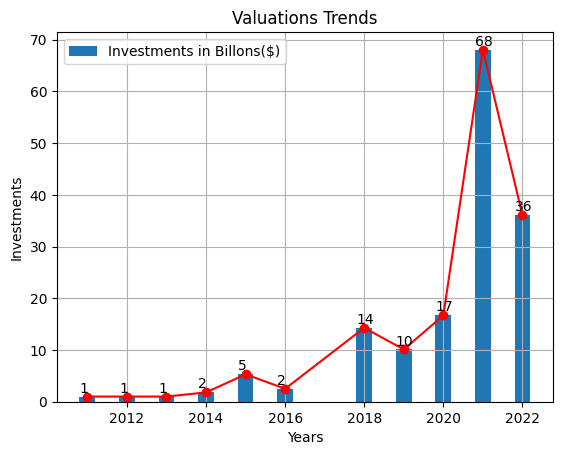

In [ ]:
pps = plt.bar(x=DatewiseData.index,height=DatewiseData['TotalInvestments'],label='Investments in Billons($)',width=0.4)
for p in pps:
  # print(p.get_width(),p.get_y()+p.get_height())
  plt.text(p.get_x(), p.get_height()+0.8, round(p.get_height()))
plt.grid()
plt.legend()
plt.xlabel("Years")
plt.ylabel("Investments")
plt.title('Valuations Trends')
plt.plot(DatewiseData.index,DatewiseData['TotalInvestments'],color='red',marker='o')
plt.show()

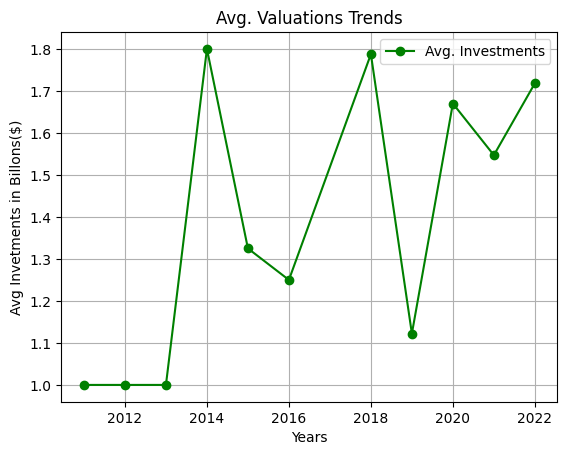

In [ ]:
plt.plot(DatewiseData.index,DatewiseData['AvgInvestment'],color='green',marker='o')
plt.xlabel("Years")
plt.ylabel("Avg Invetments in Billons($)")
plt.title('Avg. Valuations Trends')
plt.legend(['Avg. Investments'])
plt.grid()

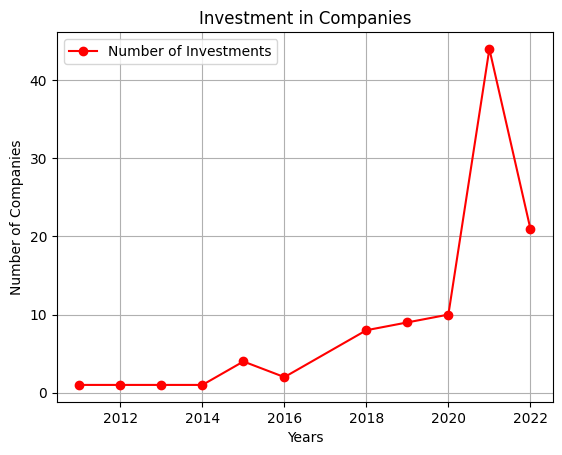

In [ ]:
plt.plot(DatewiseData.index,DatewiseData['CompanyCount'],color='red',marker='o')
plt.xlabel("Years")
plt.ylabel("Number of Companies")
plt.title('Investment in Companies')
plt.legend(['Number of Investments'])
plt.grid()

In [ ]:
testData = []
def makeLocList(data):
  testData.extend(data.split('/'))
df['Location'].apply(lambda x:makeLocList(x))
uniqueLocations = np.unique(np.array(testData))
uniqueLocations

# df['Location'] = df['Location'].apply(lambda x:x.split('/')[0])

array(['Bangalore', 'Chennai', 'Delhi', 'Goa', 'Gurgaon', 'Hyderabad',
       'Jaipur', 'Mumbai', 'Noida', 'Pune', 'Thane'], dtype='<U9')

In [ ]:
df.head()

,Company,Sector,EntryValuation,Valuation,Location,Investors,EntryYear,CurrentDate,NewEntryDate,DayInterval,ValuationGrowth,GrowthRate(PerMonth),GrowthRate(PerYear)
0,InMobi,Adtech - Mobile Ads,1.0,1.0,Bangalore,"KPCB, Sherpalo Ventures, SoftBank",2011,2023-11-01,2011-09-01,4444,0.0,0.000000,0.000000
1,Flipkart^,E-Commerce,1.0,37.6,Bangalore,"Accel, Tiger Global, Naspers, SoftBank, Tencent",2012,2023-11-01,2012-02-01,4291,36.6,0.255884,3.113260
2,Mu Sigma,SaaS - Analytics,1.0,1.5,Bangalore,"Accel, Sequoia Capital, General Atlantic",2013,2023-11-01,2013-02-01,3925,0.5,0.003822,0.046497
3,Snapdeal*,E-Commerce,1.8,2.4,Delhi,"Kalaari Capital, Nexus Ventures, Bessemer, Sof...",2014,2023-11-01,2014-10-01,3318,0.6,0.005425,0.066004
4,PayTM^,Fintech - Payments & Wallet,1.7,16.0,Noida,"Saama Capital, Elevation Capital, Alibaba, Ber...",2015,2023-11-01,2015-02-01,3195,14.3,0.134272,1.633646


In [ ]:
LocationwiseData = df.groupby(['Location']).agg(CompanyCount=('Company','count'),TotalInvestments=('EntryValuation','sum'))
LocationwiseData['AvgInvestment'] = LocationwiseData['TotalInvestments'] / LocationwiseData['CompanyCount']
LocationwiseData

,CompanyCount,TotalInvestments,AvgInvestment
Location,,,
Bangalore,41,65.30,1.592683
Chennai,5,8.10,1.620000
Delhi,7,11.53,1.647143
Goa,1,1.53,1.530000
Gurgaon,14,20.37,1.455000
Hyderabad,2,2.00,1.000000
Jaipur,2,2.82,1.410000
Mumbai,17,29.00,1.705882
Noida,6,8.60,1.433333


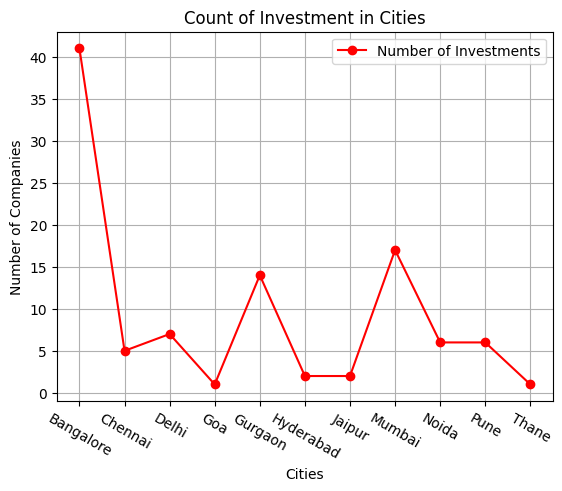

In [ ]:
plt.plot(LocationwiseData.index,LocationwiseData['CompanyCount'],color='red',marker='o')
plt.xlabel("Cities")
plt.ylabel("Number of Companies")
plt.title('Count of Investment in Cities')
plt.legend(['Number of Investments'])
plt.xticks(rotation=-30)
plt.grid()

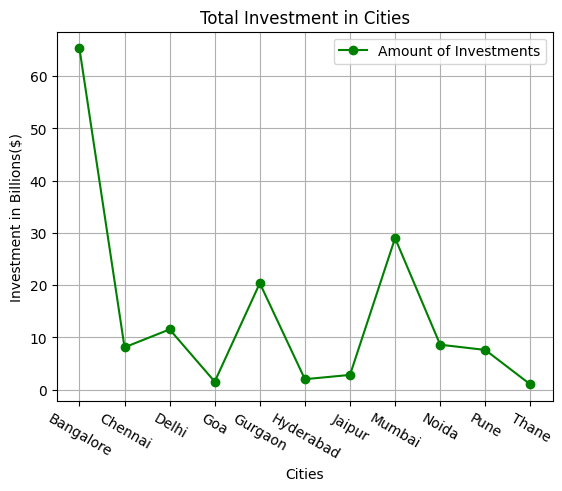

In [ ]:
plt.plot(LocationwiseData.index,LocationwiseData['TotalInvestments'],color='green',marker='o')
plt.xlabel("Cities")
plt.ylabel("Investment in Billions($)")
plt.title('Total Investment in Cities')
plt.legend(['Amount of Investments'])
plt.xticks(rotation=-30)
plt.grid()

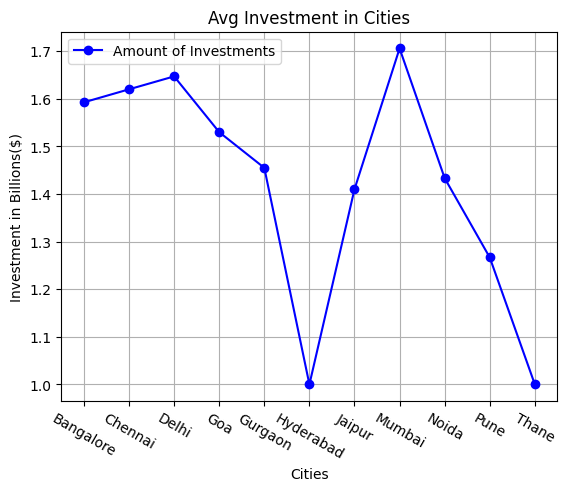

In [ ]:
plt.plot(LocationwiseData.index,LocationwiseData['AvgInvestment'],color='blue',marker='o')
plt.xlabel("Cities")
plt.ylabel("Investment in Billions($)")
plt.title('Avg Investment in Cities')
plt.legend(['Amount of Investments'])
plt.xticks(rotation=-30)
plt.grid()

In [ ]:
Investors = []
def AllInvestors(invs):
  Investors.extend(invs.split(', '))

df['Investors'].apply(lambda x:AllInvestors(x))

Investors = np.array(Investors)\

Investors

array(['KPCB', 'Sherpalo Ventures', 'SoftBank', 'Accel', 'Tiger Global',
       'Naspers', 'SoftBank', 'Tencent', 'Accel', 'Sequoia Capital',
       'General Atlantic', 'Kalaari Capital', 'Nexus Ventures',
       'Bessemer', 'SoftBank', 'Alibaba', 'Saama Capital',
       'Elevation Capital', 'Alibaba', 'Berkshire Hathway',
       'Tiger Global', 'Matrix Partners', 'Steadview', 'SoftBank',
       'Tencent', 'Matrix Partners', 'Omidyar Network', 'Norwest',
       'Kinnevik', 'Steadview Capital', 'Info Edge', 'Sequoia Capital',
       'Vy Capital', 'Alibaba', 'Steadview Capital', 'Nexus Ventures',
       'Helion Ventures', 'Beenos', 'Tiger Global', 'Others',
       'Tiger Global', 'Tencent', 'Foxconn', 'Aarin Capital',
       'Sequoia Capital', 'Lightspeed Ventures', 'Tencent',
       'General Atlantic', 'Tiger Global', 'Elevation Capital', 'Alibaba',
       'SoftBank', 'eBay', 'Accel', 'Elevation Capital', 'Norwest',
       'Naspers', 'Tencent', 'Invesco', 'Info Edge', 'Intel',
       'I

In [ ]:
InvestorsData = pd.DataFrame({'InvestorCompany':Investors})
InvestorsData.groupby(['InvestorCompany']).agg(InvestedCompCnt=('InvestorCompany','count')).describe()
TopFiveInvestors = InvestorsData.groupby(['InvestorCompany']).agg(InvestedCompCnt=('InvestorCompany','count')).sort_values(by='InvestedCompCnt',ascending=False).head()
TopFiveInvestors

,InvestedCompCnt
InvestorCompany,
Tiger Global,38
Sequoia Capital India,25
SoftBank,20
Accel India,15
Steadview Capital,14


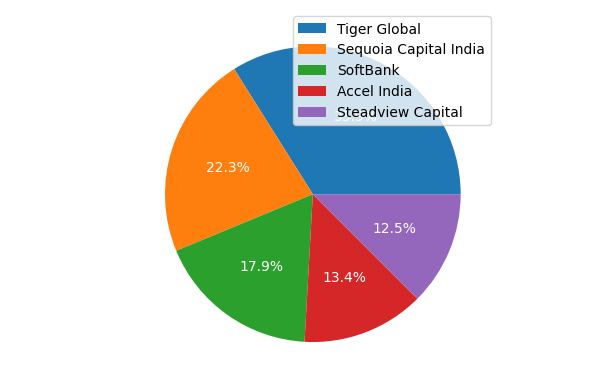

In [ ]:
plt.pie(TopFiveInvestors['InvestedCompCnt'],autopct='%1.1f%%',labels=TopFiveInvestors.index,textprops=dict(color="w"))
plt.legend()

In [ ]:
TopFiveInvestors.index

Index(['Tiger Global', 'Sequoia Capital India', 'SoftBank', 'Accel India',
       'Steadview Capital'],
      dtype='object', name='InvestorCompany')